# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_key import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 604


In [6]:
cities

['new norfolk',
 'castillos',
 'papatowai',
 'lautoka',
 'talnakh',
 'taulaga',
 "kapa'a",
 'punta arenas',
 'ola',
 'port-aux-francais',
 'ushuaia',
 'napasar',
 'porto novo',
 'mejit',
 'ribeira grande',
 'kuopio',
 'isangel',
 'sint michiel liber',
 'blackmans bay',
 'bethel',
 'vorgashor',
 'olinda',
 'la passe',
 'hawaiian paradise park',
 'taiohae',
 'tinyahuarco',
 'kerikeri',
 'vredendal',
 'anadyr',
 'adh dhibiyah',
 'quellon',
 'rosetta',
 'burnie',
 'puerto palomas',
 'udomlya',
 'nakambala',
 'port mathurin',
 'viana do castelo',
 'bilibino',
 'adamstown',
 'isafjordur',
 'badger',
 'ebon',
 'margaret river',
 'tsiombe',
 'hanzhong',
 'puerto natales',
 'chonchi',
 'pierre',
 'najran',
 'meadow lake',
 'ust-nera',
 'harper',
 'arraial do cabo',
 'kodiak',
 'itoman',
 'fale old settlement',
 'chui',
 'vilyuysk',
 'tolanaro',
 'coquimbo',
 'dubno',
 'kelso',
 'grytviken',
 'kamikawa',
 'weyburn',
 'tomatlan',
 'mafinga',
 'west island',
 'lompoc',
 'college',
 'tanrake villag

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [7]:


# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}?q={city}&appid={weather_api_key}"  # Replace YOUR_API_KEY with your actual API key
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Send GET request to the API
        response = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = response['coord']['lat']
        city_lng = response['coord']['lon']
        city_max_temp = response['main']['temp_max']
        city_humidity = response['main']['humidity']
        city_clouds = response['clouds']['all']
        city_wind = response['wind']['speed']
        city_country = response['sys']['country']
        city_date = response['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | new norfolk
Processing Record 2 of Set 1 | castillos
Processing Record 3 of Set 1 | papatowai
Processing Record 4 of Set 1 | lautoka
Processing Record 5 of Set 1 | talnakh
Processing Record 6 of Set 1 | taulaga
Processing Record 7 of Set 1 | kapa'a
Processing Record 8 of Set 1 | punta arenas
Processing Record 9 of Set 1 | ola
Processing Record 10 of Set 1 | port-aux-francais
Processing Record 11 of Set 1 | ushuaia
Processing Record 12 of Set 1 | napasar
Processing Record 13 of Set 1 | porto novo
Processing Record 14 of Set 1 | mejit
Processing Record 15 of Set 1 | ribeira grande
Processing Record 16 of Set 1 | kuopio
Processing Record 17 of Set 1 | isangel
Processing Record 18 of Set 1 | sint michiel liber
Processing Record 19 of Set 1 | blackmans bay
Processing Record 20 of Set 1 | bethel
Processing Record 21 of Set 1 | vorgashor
Processing Record 22 of Set 1 | olinda
Processing Record 23 of Set

Processing Record 41 of Set 4 | narvik
Processing Record 42 of Set 4 | penrith
Processing Record 43 of Set 4 | port alfred
Processing Record 44 of Set 4 | wailua homesteads
Processing Record 45 of Set 4 | tekman
Processing Record 46 of Set 4 | terrace
Processing Record 47 of Set 4 | faya-largeau
Processing Record 48 of Set 4 | udachny
Processing Record 49 of Set 4 | kuala sungai baru
Processing Record 0 of Set 5 | road town
Processing Record 1 of Set 5 | port elizabeth
Processing Record 2 of Set 5 | rundu
Processing Record 3 of Set 5 | ta`u
Processing Record 4 of Set 5 | uturoa
Processing Record 5 of Set 5 | queenstown
Processing Record 6 of Set 5 | sittwe
Processing Record 7 of Set 5 | utrik
Processing Record 8 of Set 5 | san julian
Processing Record 9 of Set 5 | gizo
Processing Record 10 of Set 5 | chibougamau
Processing Record 11 of Set 5 | bailesti
Processing Record 12 of Set 5 | arkhangel'sk
Processing Record 13 of Set 5 | imbituba
Processing Record 14 of Set 5 | ust-tsilma
Proces

Processing Record 31 of Set 8 | fortuna
Processing Record 32 of Set 8 | aldinga beach
Processing Record 33 of Set 8 | orkney
Processing Record 34 of Set 8 | puerto deseado
Processing Record 35 of Set 8 | praia da vitoria
Processing Record 36 of Set 8 | ben gardane
Processing Record 37 of Set 8 | turpan
Processing Record 38 of Set 8 | mendi
Processing Record 39 of Set 8 | vilhena
Processing Record 40 of Set 8 | fort st. john
Processing Record 41 of Set 8 | ghadamis
Processing Record 42 of Set 8 | elverum
Processing Record 43 of Set 8 | kidal
Processing Record 44 of Set 8 | callao
Processing Record 45 of Set 8 | kyaikkami
Processing Record 46 of Set 8 | margate
Processing Record 47 of Set 8 | strezhevoy
Processing Record 48 of Set 8 | mount pleasant
Processing Record 49 of Set 8 | iquique
Processing Record 0 of Set 9 | urengoy
Processing Record 1 of Set 9 | ongjin
Processing Record 2 of Set 9 | ukhta
Processing Record 3 of Set 9 | javanrud
Processing Record 4 of Set 9 | garachico
Process

Processing Record 18 of Set 12 | polyarnyy
Processing Record 19 of Set 12 | salinas
Processing Record 20 of Set 12 | essaouira
Processing Record 21 of Set 12 | barcelona
Processing Record 22 of Set 12 | la'ie
Processing Record 23 of Set 12 | mili
Processing Record 24 of Set 12 | guntersville
Processing Record 25 of Set 12 | nur-sultan
Processing Record 26 of Set 12 | seogwipo
City not found. Skipping...
Processing Record 27 of Set 12 | moranbah
Processing Record 28 of Set 12 | guerrero negro
Processing Record 29 of Set 12 | toga village
City not found. Skipping...
Processing Record 30 of Set 12 | selebi-phikwe
Processing Record 31 of Set 12 | santiago de cao
Processing Record 32 of Set 12 | wakimachi
Processing Record 33 of Set 12 | klyuchi
Processing Record 34 of Set 12 | kusong
Processing Record 35 of Set 12 | puerto san carlos
City not found. Skipping...
Processing Record 36 of Set 12 | colonia
Processing Record 37 of Set 12 | noumea
Processing Record 38 of Set 12 | la foa
Processin

In [13]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          569
Lat           569
Lng           569
Max Temp      569
Humidity      569
Cloudiness    569
Wind Speed    569
Country       569
Date          569
dtype: int64

In [14]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,new norfolk,-42.7826,147.0587,281.87,82,97,6.25,AU,1688831593
1,castillos,-34.1667,-53.8333,287.85,57,3,3.29,UY,1688831593
2,papatowai,-46.5619,169.4708,279.84,90,100,2.94,NZ,1688831593
3,lautoka,-17.6167,177.4667,295.07,88,40,0.00,FJ,1688831593
4,talnakh,69.4865,88.3972,291.60,79,84,1.54,RU,1688831593


In [16]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [25]:
# Read saved data
city_data_df = pd.read_csv("..\output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,new norfolk,-42.7826,147.0587,281.87,82,97,6.25,AU,1688831593
1,castillos,-34.1667,-53.8333,287.85,57,3,3.29,UY,1688831593
2,papatowai,-46.5619,169.4708,279.84,90,100,2.94,NZ,1688831593
3,lautoka,-17.6167,177.4667,295.07,88,40,0.00,FJ,1688831593
4,talnakh,69.4865,88.3972,291.60,79,84,1.54,RU,1688831593


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

In [26]:
city_data_df['Date'] = pd.to_datetime(city_data_df['Date'], unit='s').dt.strftime('%Y-%m-%d')

city_data_df['Max Temp'] = city_data_df['Max Temp'] - 273.15

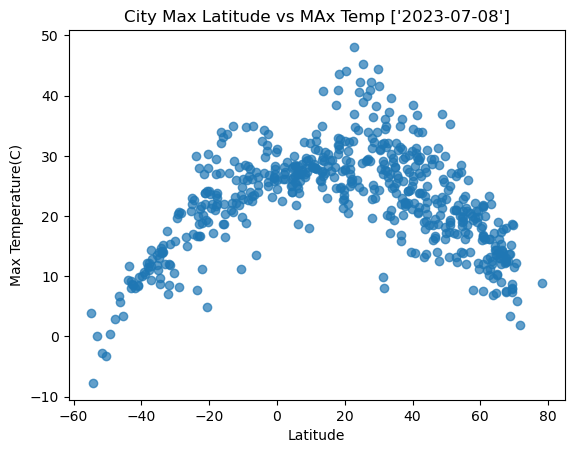

In [30]:
Weather_date = city_data_df['Date'].unique()
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], marker='o', alpha=0.7)
plt.title(f"City Max Latitude vs MAx Temp {Weather_date}")
plt.ylabel("Max Temperature(C)")
plt.xlabel("Latitude")
plt.savefig("../output_data/Fig1.png")

plt.show()

#### Latitude Vs. Humidity

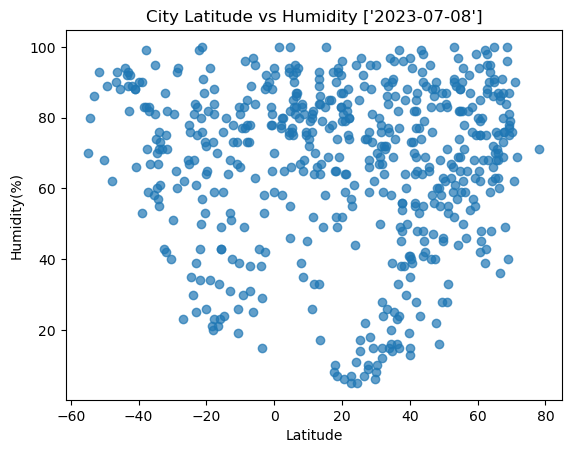

In [33]:
# Build the scatter plots for latitude vs. humidity

plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], marker='o', alpha=0.7)
plt.title(f"City Latitude vs Humidity {Weather_date}")
plt.ylabel("Humidity(%)")
plt.xlabel("Latitude")


# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

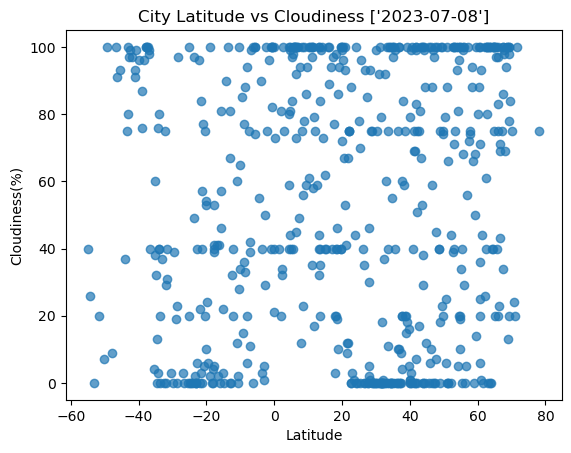

In [35]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], marker='o', alpha=0.7)
plt.title(f"City Latitude vs Cloudiness {Weather_date}")
plt.ylabel("Cloudiness(%)")
plt.xlabel("Latitude")

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

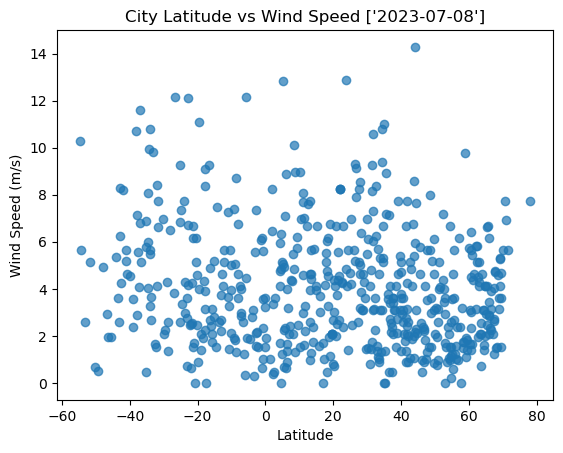

In [36]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], marker='o', alpha=0.7)
plt.title(f"City Latitude vs Wind Speed {Weather_date}")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

In [37]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df = city_data_df[city_data_df['Lat']>= 0]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
4,talnakh,69.4865,88.3972,18.45,79,84,1.54,RU,2023-07-08
6,kapa'a,22.0752,-159.3190,26.18,80,75,8.23,US,2023-07-08
8,ola,59.5833,151.2833,11.24,75,14,1.38,RU,2023-07-08
11,napasar,27.9667,73.5500,31.23,66,46,3.19,IN,2023-07-08
12,porto novo,6.4965,2.6036,26.90,93,100,4.00,BJ,2023-07-08


In [39]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = city_data_df[city_data_df['Lat']< 0]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,new norfolk,-42.7826,147.0587,8.72,82,97,6.25,AU,2023-07-08
1,castillos,-34.1667,-53.8333,14.70,57,3,3.29,UY,2023-07-08
2,papatowai,-46.5619,169.4708,6.69,90,100,2.94,NZ,2023-07-08
3,lautoka,-17.6167,177.4667,21.92,88,40,0.00,FJ,2023-07-08
5,taulaga,-11.0553,-171.0883,28.17,73,60,7.26,AS,2023-07-08


###  Temperature vs. Latitude Linear Regression Plot

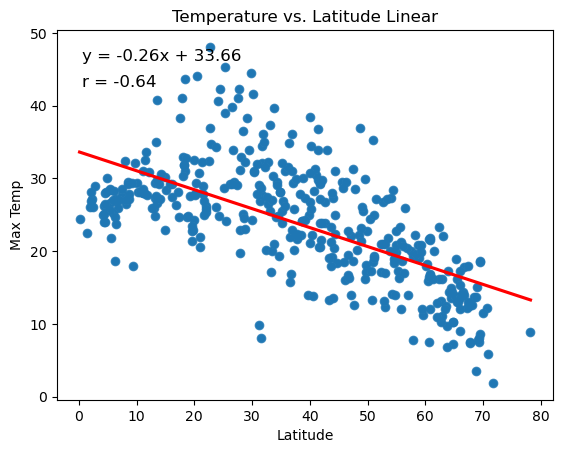

In [56]:
# Linear regression on Northern Hemisphere
%matplotlib inline
import seaborn as sns
import numpy as np

x= northern_hemi_df['Lat'].tolist()
y = northern_hemi_df['Max Temp'].tolist()


sns.scatterplot(x=x, y=y)

    # Add a linear regression line
sns.regplot(x=x, y=y, ci=None, line_kws={'color': 'red'})

    # Perform linear regression to get slope and intercept
slope, intercept = np.polyfit(x, y, 1)
r_value = np.corrcoef(x, y)[0, 1]
r_value_text = f"r = {r_value:.2f}"
    # Create the equation string
equation = f"y = {slope:.2f}x + {intercept:.2f}"

    # Add the equation as text annotation in the plot
plt.text(0.05, 0.95, equation, ha='left', va='top', transform=plt.gca().transAxes, fontsize=12)
plt.text(0.05, 0.88, r_value_text, ha='left', va='top', transform=plt.gca().transAxes, fontsize=12)
    # Set plot title and labels
plt.title("Temperature vs. Latitude Linear")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")

    # Show the plot
plt.show()

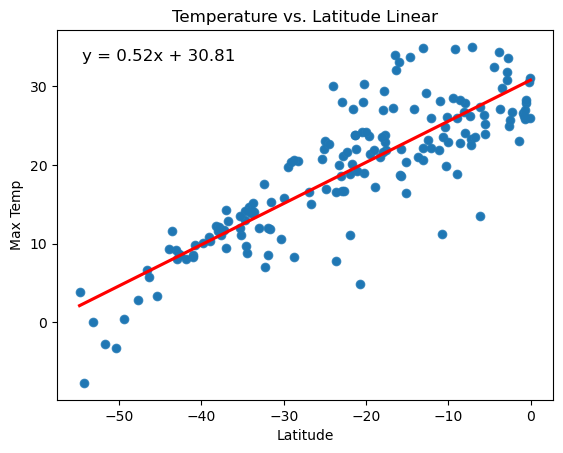

In [54]:
# Linear regression on Southern Hemisphere
x= southern_hemi_df['Lat'].tolist()
y = southern_hemi_df['Max Temp'].tolist()


sns.scatterplot(x=x, y=y)

    # Add a linear regression line
sns.regplot(x=x, y=y, ci=None, line_kws={'color': 'red'})

    # Perform linear regression to get slope and intercept
slope, intercept = np.polyfit(x, y, 1)
r_value = np.corrcoef(x, y)[0, 1]
r_value_text = f"r = {r_value:.2f}"
    # Create the equation string
equation = f"y = {slope:.2f}x + {intercept:.2f}"

    # Add the equation as text annotation in the plot
plt.text(0.05, 0.95, equation, ha='left', va='top', transform=plt.gca().transAxes, fontsize=12)
plt.text(0.05, 0.88, r_value_text, ha='left', va='top', transform=plt.gca().transAxes, fontsize=12)

    # Set plot title and labels
plt.title("Temperature vs. Latitude Linear")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")

    # Show the plot
plt.show()

**Discussion about the linear relationship:** The temperature to Latitude is negatively correlated in northern hamisphere i.e. the more north we go the temp will go down. for Southern hamisphere we can observe the opposite relationship

### Humidity vs. Latitude Linear Regression Plot

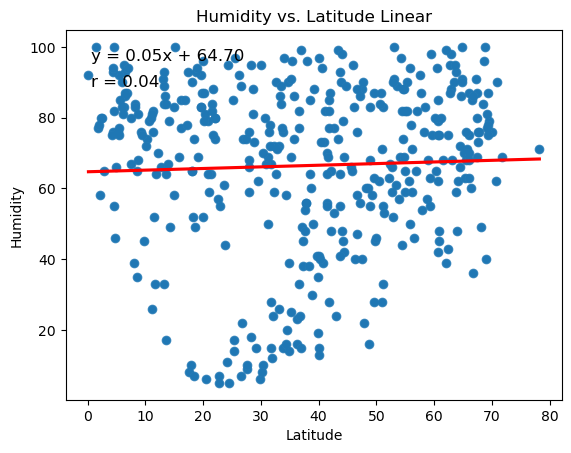

In [60]:
# Northern Hemisphere

x= northern_hemi_df['Lat'].tolist()
y = northern_hemi_df['Humidity'].tolist()


sns.scatterplot(x=x, y=y)

    # Add a linear regression line
sns.regplot(x=x, y=y, ci=None, line_kws={'color': 'red'})

    # Perform linear regression to get slope and intercept
slope, intercept = np.polyfit(x, y, 1)
r_value = np.corrcoef(x, y)[0, 1]
r_value_text = f"r = {r_value:.2f}"
    # Create the equation string
equation = f"y = {slope:.2f}x + {intercept:.2f}"

    # Add the equation as text annotation in the plot
plt.text(0.05, 0.95, equation, ha='left', va='top', transform=plt.gca().transAxes, fontsize=12)
plt.text(0.05, 0.88, r_value_text, ha='left', va='top', transform=plt.gca().transAxes, fontsize=12)

    # Set plot title and labels
plt.title("Humidity vs. Latitude Linear")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

    # Show the plot
plt.show()

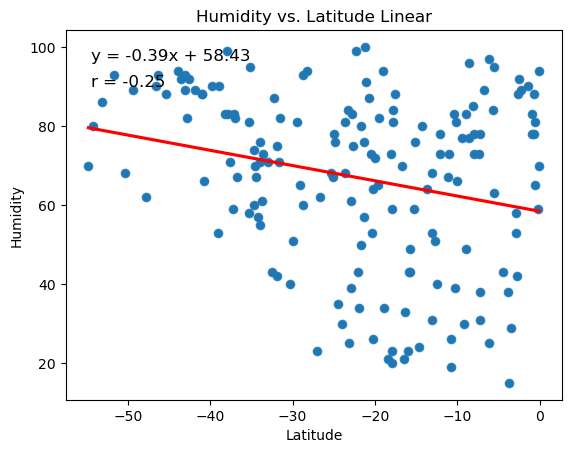

In [61]:
# Southern Hemisphere
x = southern_hemi_df['Lat'].tolist()
y = southern_hemi_df['Humidity'].tolist()


sns.scatterplot(x=x, y=y)

    # Add a linear regression line
sns.regplot(x=x, y=y, ci=None, line_kws={'color': 'red'})

    # Perform linear regression to get slope and intercept
slope, intercept = np.polyfit(x, y, 1)
r_value = np.corrcoef(x, y)[0, 1]
r_value_text = f"r = {r_value:.2f}"
    # Create the equation string
equation = f"y = {slope:.2f}x + {intercept:.2f}"

    # Add the equation as text annotation in the plot
plt.text(0.05, 0.95, equation, ha='left', va='top', transform=plt.gca().transAxes, fontsize=12)
plt.text(0.05, 0.88, r_value_text, ha='left', va='top', transform=plt.gca().transAxes, fontsize=12)

    # Set plot title and labels
plt.title("Humidity vs. Latitude Linear")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

    # Show the plot
plt.show()

**Discussion about the linear relationship:** The more south we go the humidity rises but in northern hemisphere the relationship is not clear due to lack of concentration/abuandance of outlier values.

### Cloudiness vs. Latitude Linear Regression Plot

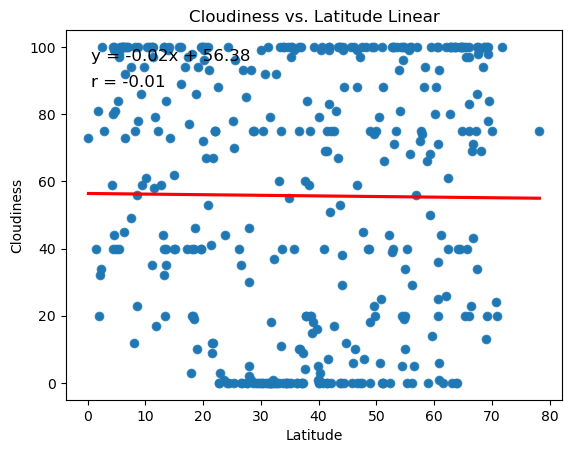

In [62]:
# Northern Hemisphere
x= northern_hemi_df['Lat'].tolist()
y = northern_hemi_df['Cloudiness'].tolist()


sns.scatterplot(x=x, y=y)

    # Add a linear regression line
sns.regplot(x=x, y=y, ci=None, line_kws={'color': 'red'})

    # Perform linear regression to get slope and intercept
slope, intercept = np.polyfit(x, y, 1)
r_value = np.corrcoef(x, y)[0, 1]
r_value_text = f"r = {r_value:.2f}"
    # Create the equation string
equation = f"y = {slope:.2f}x + {intercept:.2f}"

    # Add the equation as text annotation in the plot
plt.text(0.05, 0.95, equation, ha='left', va='top', transform=plt.gca().transAxes, fontsize=12)
plt.text(0.05, 0.88, r_value_text, ha='left', va='top', transform=plt.gca().transAxes, fontsize=12)

    # Set plot title and labels
plt.title("Cloudiness vs. Latitude Linear")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

    # Show the plot
plt.show()

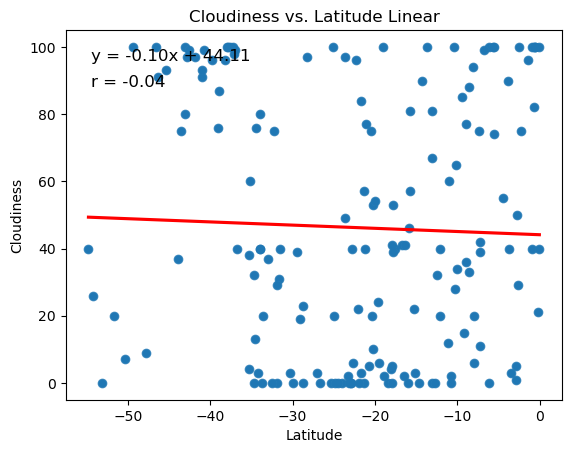

In [63]:
# Southern Hemisphere
x= southern_hemi_df['Lat'].tolist()
y = southern_hemi_df['Cloudiness'].tolist()


sns.scatterplot(x=x, y=y)

    # Add a linear regression line
sns.regplot(x=x, y=y, ci=None, line_kws={'color': 'red'})

    # Perform linear regression to get slope and intercept
slope, intercept = np.polyfit(x, y, 1)
r_value = np.corrcoef(x, y)[0, 1]
r_value_text = f"r = {r_value:.2f}"
    # Create the equation string
equation = f"y = {slope:.2f}x + {intercept:.2f}"

    # Add the equation as text annotation in the plot
plt.text(0.05, 0.95, equation, ha='left', va='top', transform=plt.gca().transAxes, fontsize=12)
plt.text(0.05, 0.88, r_value_text, ha='left', va='top', transform=plt.gca().transAxes, fontsize=12)

    # Set plot title and labels
plt.title("Cloudiness vs. Latitude Linear")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

    # Show the plot
plt.show()

**Discussion about the linear relationship:** both northern and southern hamisphere have data that doesn't accurately descrive the relationship due to the outliers. perhaps we would need data from more dates all year round to get a sense.

### Wind Speed vs. Latitude Linear Regression Plot

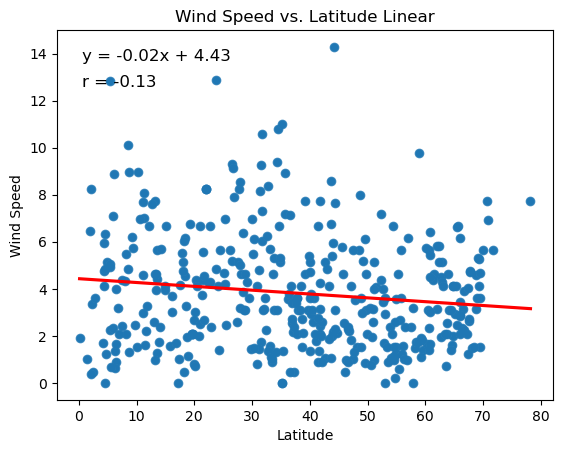

In [64]:
# Northern Hemisphere
x= northern_hemi_df['Lat'].tolist()
y = northern_hemi_df['Wind Speed'].tolist()


sns.scatterplot(x=x, y=y)

    # Add a linear regression line
sns.regplot(x=x, y=y, ci=None, line_kws={'color': 'red'})

    # Perform linear regression to get slope and intercept
slope, intercept = np.polyfit(x, y, 1)
r_value = np.corrcoef(x, y)[0, 1]
r_value_text = f"r = {r_value:.2f}"
    # Create the equation string
equation = f"y = {slope:.2f}x + {intercept:.2f}"

    # Add the equation as text annotation in the plot
plt.text(0.05, 0.95, equation, ha='left', va='top', transform=plt.gca().transAxes, fontsize=12)
plt.text(0.05, 0.88, r_value_text, ha='left', va='top', transform=plt.gca().transAxes, fontsize=12)

    # Set plot title and labels
plt.title("Wind Speed vs. Latitude Linear")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

    # Show the plot
plt.show()

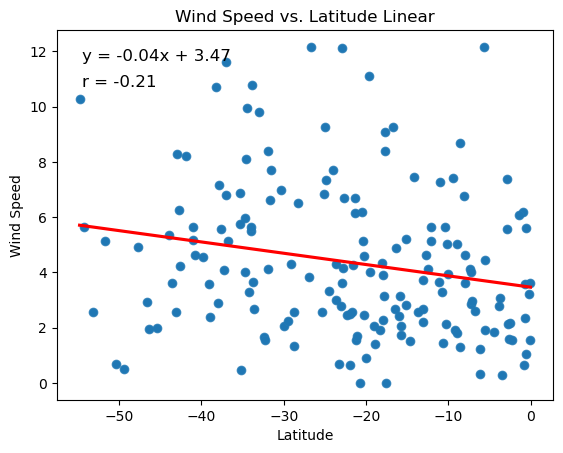

In [65]:
# Southern Hemisphere
x= southern_hemi_df['Lat'].tolist()
y = southern_hemi_df['Wind Speed'].tolist()


sns.scatterplot(x=x, y=y)

    # Add a linear regression line
sns.regplot(x=x, y=y, ci=None, line_kws={'color': 'red'})

    # Perform linear regression to get slope and intercept
slope, intercept = np.polyfit(x, y, 1)
r_value = np.corrcoef(x, y)[0, 1]
r_value_text = f"r = {r_value:.2f}"
    # Create the equation string
equation = f"y = {slope:.2f}x + {intercept:.2f}"

    # Add the equation as text annotation in the plot
plt.text(0.05, 0.95, equation, ha='left', va='top', transform=plt.gca().transAxes, fontsize=12)
plt.text(0.05, 0.88, r_value_text, ha='left', va='top', transform=plt.gca().transAxes, fontsize=12)

    # Set plot title and labels
plt.title("Wind Speed vs. Latitude Linear")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

    # Show the plot
plt.show()

**Discussion about the linear relationship:** The more south we go the wind speed increases which kind of explains why many cyclones happens in the southern hamisphere